# Predicting the phase transition of the two dimensional Ising model using neural networks

We will in this notebook repeat the process of predicting the phase transition of the two dimensional Ising model as we did with logistic regression, but now we will employ  a _feed-forwad neural network_.

## Predicting the phase of the two-dimensional Ising model using a feed-forward neural network

We now predict the phase transition using Scikit-learn's implementation of a _multilayer perceptron neural network_. This is one of the simpler versions of a neural network.

A neural network consists of layers of _neurons_ or perceptrons. A neuron can take a continuous value where as a perceptron will be either "on" or "off". Scikit-learn's `MLPClassifier` is called a multilayer perceptron model, but it uses neurons. A neuron accepts a vector of inputs $x$ and produces a scalar output $a_i$. A layer of neurons take in the a matrix $X$ and produces an activation vector $a$ consisting of each $a_i$ from each neuron in that layer.

\begin{align}
    z^{(l)} = a^{(l - 1)}w^{(l)} + b^{(l)},
\end{align}

where $w^{(l)}$ is that layers _weights_ and $b^{(l)}$ is that layers _biases_. The activation $a^{(l)}$ is now computed by

\begin{align}
    a^{(l)} = f(z^{(l)}),
\end{align}

where $f(z)$ is an _activation function_. The first activation is given by $a^{(0)} = X$, where $X$ is the input data.

It is common to use the cross-entropy as the cost function for a categorical neural network. This is the same the one used in logistic regression.

### Training a neural network

The training of a neural network is a tricky affair as each neuron in each layer must be updated to minimize a cost function. The minimization process resembles that of other classifiers and regressors in that we use an optimization algorithm, e.g., stochastic gradient descent, to compute the change in the weights and biases in order to find a minimum of the cost function. The tricky part comes in computing the gradients of the weights and biases in the neural network. Due to an ingenious technique called _backpropagation_ this can be done within reasonable time. The algorithm is listed below.

1. Do a feedforward pass, i.e., compute all activations $a^{(l)}$ as listed above.
2. Calculate the error of the weights and biases using
\begin{align}
    \delta_{j}^{(l)} = \frac{\partial C}{\partial a_{j}^{(l)}} \frac{\mathrm{d}f(z_j^{(l)})}{\mathrm{d}z}.
\end{align}
3. Propagate the error backwards (hence backpropagation) using
\begin{align}
    \delta_{j}^{(l)} = \left(
        \sum_{k}\delta_k^{(l + 1)}\omega_{kj}^{(l + 1)}
    \right)\frac{\mathrm{d}f(z_j^{(l)}}{\mathrm{d}z}.
\end{align}
4. Compute the change in the gradients of the weights and biases.
\begin{align}
    \omega^{(l)} &\to \omega^{(l)} - \frac{\eta}{m}\sum_{k}\delta^{(l)}_ka_k^{(l - 1)}, \\
    b^{(l)} &\to b^{(l)} - \frac{\eta}{m}\sum_{k}\delta^{(l)}_k,
\end{align}
    where $\eta$ is the learning rate and $m$ is the number of elements (batch size in the case of stochastic gradient descent).

We will do a large search over a two-dimensional parameter grid for varying hidden layer sizes and learning rate.

## DIY Neural net from Keras


An easier approach is to use libraries such as Tensorflow or Keras (which by default uses Tensorflow as a backend) to specify how the neural net should be. The libraries then build a neural net based on your specifications and lets you fit and predict on your very own construct. As a bonus, Tensorflow builds a graph from the executing code thus figuring out the most optimal way of executing the code and which parts of the code that can be done in parallel.

A perk of building a neural net this way is that we have a lot of freedom in how we build our neural net. For instance, we can set individual activation functions for each layer, decide the optimization technique to use, the cost function to minimize, which metric to evaluate our model on etc.

We now build a neural net from Keras with three hidden layers. The input and the hidden layer uses the activation function

\begin{align}
    f(z_j) = \tanh(z_j),
\end{align}

whereas the output layer uses the _softmax_ activation function.

\begin{align}
    g(z_j) = \frac{e^{z_j}}{\sum_{i = 1}^{n} e^{z_i}}.
\end{align}

We avoid using the tangent hyperbolicus for the output layer as $f(z_j) \in [-1, 1]$ as opposed to the softmax function with $g(z_j) \in [0, 1]$. The latter more fits the categorical classification. Another perk of using the softmax activation function is that it better weighs all the classes in a multiclassification setting much as the partition function. We use stochastic gradient descent as our optimizer and the cross-entropy (shown in the notebook on logistic regression) as our cost function.

In [32]:
clf = km.Sequential()

clf.add(
    kl.Dense(50, activation="tanh", input_dim=X_train.shape[1])
)
clf.add(
    kl.Dense(100, activation="tanh")
)
clf.add(
    kl.Dense(200, activation="tanh")
)

clf.add(
    kl.Dense(2, activation="softmax")
)
clf.compile(
    loss="binary_crossentropy",
    optimizer=ko.SGD(
        lr=0.01
    ),
    metrics=["accuracy"]
)

We have to convert our integer labels to categorical values in a format that Keras accepts.

In [33]:
y_train_k = to_categorical(y_train[:, np.newaxis])
y_test_k = to_categorical(y_test[:, np.newaxis])
y_critical_k = to_categorical(labels[critical][:, np.newaxis])

We now fit our model for $10$ epochs and validate on the test data.

In [34]:
history = clf.fit(
    X_train, y_train_k,
    validation_data=(X_test, y_test_k),
    epochs=10,
    batch_size=200,
    verbose=True
)

Train on 65000 samples, validate on 65000 samples
Epoch 1/10
65000/65000 [==============================] - 6s 88us/step - loss: 0.6629 - acc: 0.6971 - val_loss: 0.5873 - val_acc: 0.8317
Epoch 2/10
65000/65000 [==============================] - 5s 72us/step - loss: 0.4253 - acc: 0.9397 - val_loss: 0.2529 - val_acc: 0.9956
Epoch 3/10
65000/65000 [==============================] - 5s 76us/step - loss: 0.1287 - acc: 0.9950 - val_loss: 0.0639 - val_acc: 0.9989
Epoch 4/10
65000/65000 [==============================] - 3s 44us/step - loss: 0.0419 - acc: 0.9992 - val_loss: 0.0300 - val_acc: 0.9990
Epoch 5/10
65000/65000 [==============================] - 3s 46us/step - loss: 0.0222 - acc: 0.9994 - val_loss: 0.0189 - val_acc: 0.9991
Epoch 6/10
65000/65000 [==============================] - 3s 43us/step - loss: 0.0146 - acc: 0.9994 - val_loss: 0.0137 - val_acc: 0.9991
Epoch 7/10
65000/65000 [==============================] - 3s 48us/step - loss: 0.0106 - acc: 0.9994 - val_loss: 0.0107 - val_acc

We now evaluate the model.

In [35]:
train_accuracy = clf.evaluate(X_train, y_train_k, batch_size=200)[1]
test_accuracy = clf.evaluate(X_test, y_test_k, batch_size=200)[1]
critical_accuracy = clf.evaluate(data[critical], y_critical_k, batch_size=200)[1]

print ("Accuracy on train data: {0}".format(train_accuracy))
print ("Accuracy on test data: {0}".format(test_accuracy))
print ("Accuracy on critical data: {0}".format(critical_accuracy))

30000/30000 [==============================] - 3s 103us/step
Accuracy on train data: 0.999538461978619
Accuracy on test data: 0.9992307699643649
Accuracy on critical data: 0.9312000012397766


Then we plot the ROC curve for three datasets.

Keras AUC (Train): 0.9999965210789427
Keras AUC (Test): 0.9999774128074636
Keras AUC (Critical): 0.9849365475


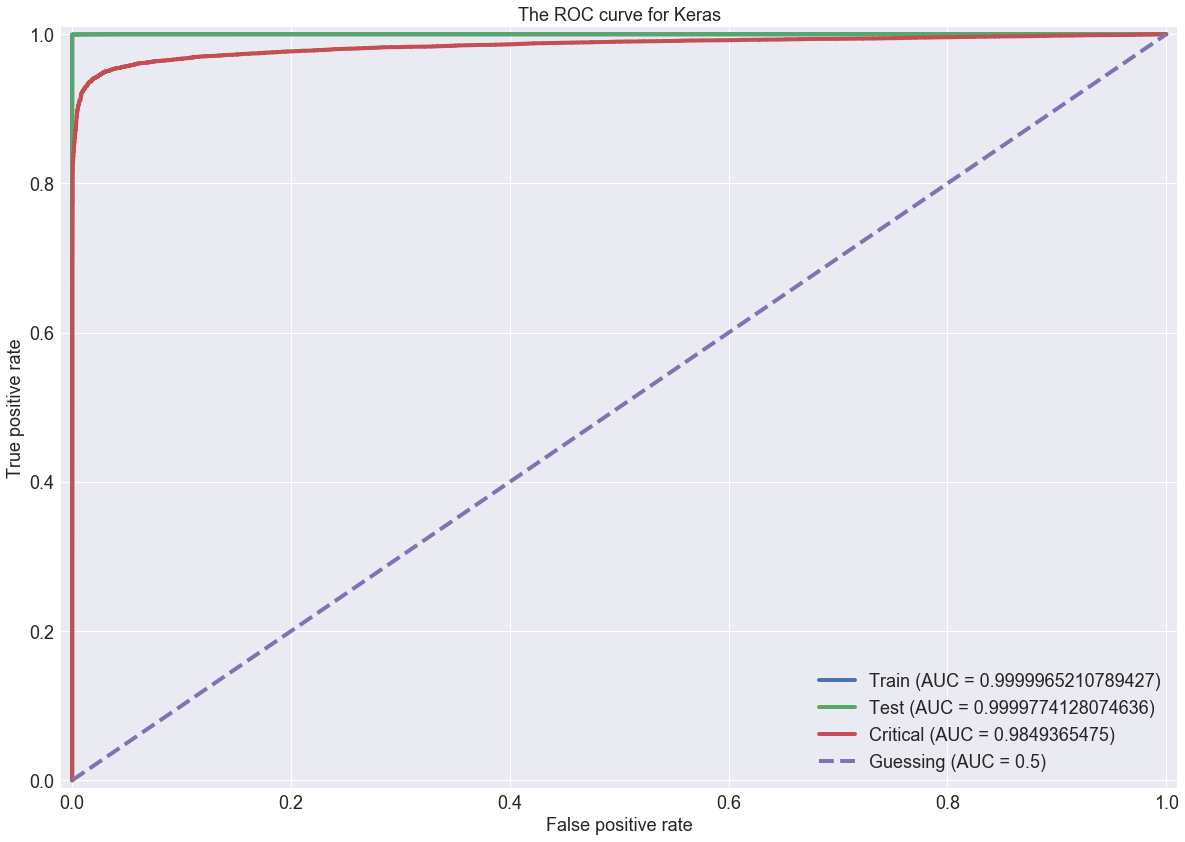

In [36]:
fig = plt.figure(figsize=(20, 14))

for (_X, _y), label in zip(
    [
        (X_train, y_train_k),
        (X_test, y_test_k),
        (data[critical], y_critical_k)
    ],
    ["Train", "Test", "Critical"]
):
    proba = clf.predict(_X)
    fpr, tpr, _ = skm.roc_curve(_y[:, 1], proba[:, 1])
    roc_auc = skm.auc(fpr, tpr)

    print ("Keras AUC ({0}): {1}".format(label, roc_auc))

    plt.plot(fpr, tpr, label="{0} (AUC = {1})".format(label, roc_auc), linewidth=4.0)

plt.plot([0, 1], [0, 1], "--", label="Guessing (AUC = 0.5)", linewidth=4.0)

plt.title(r"The ROC curve for Keras", fontsize=18)
plt.xlabel(r"False positive rate", fontsize=18)
plt.ylabel(r"True positive rate", fontsize=18)
plt.axis([-0.01, 1.01, -0.01, 1.01])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="best", fontsize=18)
plt.show()

We see that we get much the same performance as for the `MLPClassifier` from Scikit-learn.

## Conclusion

We have successfully used  a neural net using Keras and predicted the phase transition of the two-dimensional Ising model. As opposed to the logistic regression we get a much better performance on all datasets. More importantly we successfully predict reasonable values on the critical dataset which is extrapolated from the training and testing data.